In [1]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from random import *
%matplotlib inline

In [67]:
# A) XOR
a_data_X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype='float32')
a_data_y = np.array([[0],[1],[1],[0]],dtype='float32')

X_train, X_val, X_test = a_data_X, a_data_X, a_data_X
y_train, y_val, y_test = a_data_y, a_data_y, a_data_y

In [68]:
from keras.initializers import VarianceScaling
#Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer=VarianceScaling(), activation = 'relu', input_dim=2))
classifier.add(Dense(units = 4, kernel_initializer=VarianceScaling(), activation = 'relu'))
classifier.add(Dense(1, kernel_initializer=VarianceScaling(), activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 150,validation_data=(X_val, y_val),callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10,min_delta=0.1, verbose=10)])

Epoch 1/150
1/1 [==============================] - 0s 130ms/step - loss: 0.6691 - accuracy: 0.7500 - val_loss: 0.6684 - val_accuracy: 0.5000
Epoch 2/150
1/1 [==============================] - 0s 34ms/step - loss: 0.6684 - accuracy: 0.5000 - val_loss: 0.6677 - val_accuracy: 0.7500
Epoch 3/150
1/1 [==============================] - 0s 48ms/step - loss: 0.6677 - accuracy: 0.7500 - val_loss: 0.6670 - val_accuracy: 0.7500
Epoch 4/150
1/1 [==============================] - 0s 42ms/step - loss: 0.6670 - accuracy: 0.7500 - val_loss: 0.6662 - val_accuracy: 0.7500
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.6662 - accuracy: 0.7500 - val_loss: 0.6655 - val_accuracy: 0.7500
Epoch 6/150
1/1 [==============================] - 0s 38ms/step - loss: 0.6655 - accuracy: 0.7500 - val_loss: 0.6647 - val_accuracy: 0.7500
Epoch 7/150
1/1 [==============================] - 0s 46ms/step - loss: 0.6647 - accuracy: 0.7500 - val_loss: 0.6640 - val_accuracy: 0.7500
Epoch 8/150
1/1 [==

In [69]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


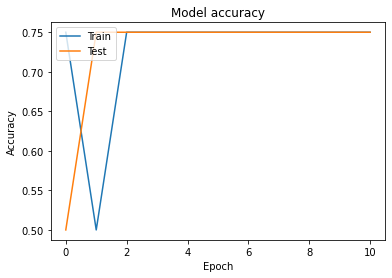

In [72]:
history_dict = history.history
print(history_dict.keys())

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

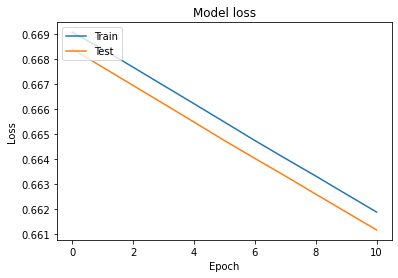

In [73]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')